In [36]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import regularizers 
from tensorflow.keras import optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score
import keras
import tensorflow as tf


sequential_data = np.load("Signals.npz", allow_pickle=True)["a"].item()
train_data = pd.read_csv("metadata_train.csv")

#test_data = pd.read_csv("metadata_test.csv")

y = train_data['CycleToFailureNormalized']
train_index = train_data["SignalID"].to_numpy()
tab1 = []

std1 = []
extreme_changes = []
std_a = []
std_b = []
std_c = []

for x in train_index:
    
    a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,r,s,t,u,A,B,C,D,E,F,G,H,I,J = np.array_split(sequential_data[x],30)
    std1.append(np.array([np.std(a,axis=0),np.std(b,axis=0),np.std(c,axis=0),np.std(d,axis=0),np.std(e,axis=0),np.std(f,axis=0),np.std(g,axis=0),np.std(h,axis=0),np.std(i,axis=0),np.std(j,axis=0),
                    np.std(k,axis=0),np.std(l,axis=0),np.std(m,axis=0),np.std(n,axis=0),np.std(o,axis=0),
                    np.std(p,axis=0),np.std(r,axis=0),np.std(s,axis=0),np.std(t,axis=0),np.std(u,axis=0),
                    np.std(A,axis=0),np.std(B,axis=0),np.std(C,axis=0),np.std(D,axis=0),np.std(E,axis=0),
                    np.std(F,axis=0),np.std(G,axis=0),np.std(H,axis=0),np.std(I,axis=0),np.std(J,axis=0)]))

    if (np.max(std1)-np.min(std1))>8000:
        extreme_changes.append(int(np.max(std1)-np.min(std1)))
    else:
        extreme_changes.append(int(0))
 
x = pd.DataFrame(std1)
train_data["a"] = x[x.columns[0]]
train_data["b"] = x[x.columns[1]]
train_data["c"] = x[x.columns[2]]
train_data["d"] = x[x.columns[3]]
train_data["e"] = x[x.columns[4]]
train_data["f"] = x[x.columns[5]]
train_data["g"] = x[x.columns[6]]
train_data["h"] = x[x.columns[7]]
train_data["i"] = x[x.columns[8]]
train_data["j"] = x[x.columns[9]]
train_data["k"] = x[x.columns[10]]
train_data["l"] = x[x.columns[11]]
train_data["m"] = x[x.columns[12]]
train_data["n"] = x[x.columns[13]]
train_data["o"] = x[x.columns[14]]
train_data["p"] = x[x.columns[15]]
train_data["r"] = x[x.columns[16]]
train_data["s"] = x[x.columns[17]]
train_data["t"] = x[x.columns[18]]
train_data["u"] = x[x.columns[19]]
train_data["A"] = x[x.columns[20]]
train_data["B"] = x[x.columns[21]]
train_data["C"] = x[x.columns[22]]
train_data["D"] = x[x.columns[23]]
train_data["E"] = x[x.columns[24]]
train_data["F"] = x[x.columns[25]]
train_data["G"] = x[x.columns[26]]
train_data["H"] = x[x.columns[27]]
train_data["I"] = x[x.columns[28]]
train_data["J"] = x[x.columns[29]]

train_data["extreme_changes"]= extreme_changes

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 29, 128)           1408      
                                                                 
 dropout_19 (Dropout)        (None, 29, 128)           0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 25, 64)            41024     
                                                                 
 Conv1D_3 (Conv1D)           (None, 23, 32)            6176      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 11, 32)           0         
                                                                 
 flatten_18 (Flatten)        (None, 352)               0         
                                                                 
 Dense_1 (Dense)             (None, 32)               

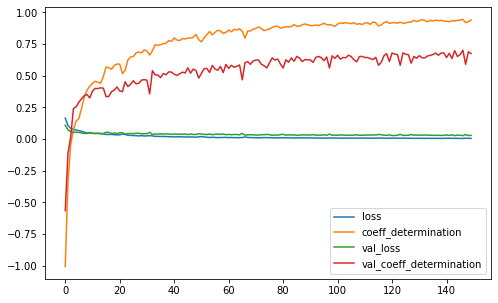

Accuracy on test set for MULTI-CONV_1D: 0.631633


In [37]:
X = train_data
X.drop('CycleToFailureNormalized', inplace=True, axis=1)
X.drop('SignalID', inplace=True, axis=1)
X.drop('ToolIndex', inplace=True, axis=1)

#print(X.columns)

train_data, test_data, train_labels, test_labels = train_test_split(X.values, y.values, test_size=0.2, random_state  = None)

#print(train_data.shape)
#print(train_labels.shape)
#print(test_labels.shape)
#print(test_data.shape)

train_data_copy = train_data.copy()
test_data_copy = test_data.copy()
train_labels_copy = train_labels.copy()
test_labels_copy = test_labels.copy()

Scaler = MinMaxScaler()
Scaler.fit(train_data)
train_data = Scaler.transform(train_data)
test_data = Scaler.transform(test_data)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

#print(train_data.shape)
#print(train_data[0].shape)
#print(train_data[0])

sample_size = train_data.shape[0] # number of samples in train set
time_steps  = train_data.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = train_data.reshape(sample_size,time_steps,input_dimension)
#print("After reshape train data set shape:\n", train_data_reshaped.shape)
#print("1 Sample shape:\n",train_data_reshaped[0].shape)
#print("An example sample:\n", train_data_reshaped[0])

test_data_reshaped = test_data.reshape(test_data.shape[0],test_data.shape[1],1)
#print(test_data_reshaped.shape)

def build_conv1D_model():

  n_timesteps = train_data_reshaped.shape[1] #13
  n_features  = train_data_reshaped.shape[2] #1 
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.4))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', name="Conv1D_2"))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_3"))
  
  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=[coeff_determination])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

history = model_conv1D.fit(train_data_reshaped,
                            train_labels,
                            epochs=EPOCHS,
                            validation_split=0.1,
                            verbose=0,
                            )
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

[loss, r_2] = model_conv1D.evaluate(test_data_reshaped, test_labels, verbose=0)
print("Accuracy on test set for MULTI-CONV_1D: {:2f}".format(r_2))
